In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('/content/sales_data_1.csv')
df

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


In [137]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Calculating Total Revenue (TR)
df['Total Revenue'] = df['Quantity sold'] * df['Selling price']

# Calculating COGS
df['COGS'] = df['Quantity sold'] * df['Buying price']

# 1. Overall gross margin for their business
total_revenue = df['Total Revenue'].sum()
cogs = df['COGS'].sum()
gross_margin_percentage = ((total_revenue - cogs) / total_revenue) * 100
print(f"1. Overall Gross Margin: {gross_margin_percentage:.2f}%")

1. Overall Gross Margin: 24.63%


In [138]:
df.head(70)

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Total Revenue,COGS
0,2023-08-21,Vendor6,72.11,Customer7,91.58,44,4029.52,3172.84
1,2023-08-21,Vendor4,75.08,Customer7,83.71,17,1423.07,1276.36
2,2023-08-21,Vendor7,83.93,Customer2,103.76,15,1556.40,1258.95
3,2023-08-21,Vendor7,52.01,Customer3,64.53,7,451.71,364.07
4,2023-08-21,Vendor2,98.91,Customer5,140.92,1,140.92,98.91
...,...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,Customer6,87.45,18,1574.10,1166.76
66,2023-08-27,Vendor8,88.79,Customer3,105.59,5,527.95,443.95
67,2023-08-27,Vendor5,63.30,Customer5,92.92,32,2973.44,2025.60
68,2023-08-27,Vendor5,94.06,Customer5,125.67,4,502.68,376.24


In [139]:
df['gross profit'] = df['Total Revenue']-df['COGS']

In [140]:
df.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Total Revenue,COGS,gross profit
0,2023-08-21,Vendor6,72.11,Customer7,91.58,44,4029.52,3172.84,856.68
1,2023-08-21,Vendor4,75.08,Customer7,83.71,17,1423.07,1276.36,146.71
2,2023-08-21,Vendor7,83.93,Customer2,103.76,15,1556.40,1258.95,297.45
3,2023-08-21,Vendor7,52.01,Customer3,64.53,7,451.71,364.07,87.64
4,2023-08-21,Vendor2,98.91,Customer5,140.92,1,140.92,98.91,42.01


In [141]:
df.groupby('Firm bought from')['gross profit'].sum()

Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: gross profit, dtype: float64

#2. Most Profitable by Vendor


In [142]:
profit_by_vendor = df.groupby('Firm bought from')['gross profit'].sum()
most_profitable_vendor = profit_by_vendor.idxmax()
print(f"2. Most Profitable Vendor: {most_profitable_vendor}")

2. Most Profitable Vendor: Vendor4


# 3. Least profitable customer

In [143]:
profit_by_customer = df.groupby('Customer')['Total Revenue'].sum()
least_profitable_customer = profit_by_customer.idxmin()
print(f"3. Least Profitable Customer: {least_profitable_customer}")

3. Least Profitable Customer: Customer3


# 4. Most profitable day of the week


In [144]:
df['Day of Week'] = df['Date'].dt.day_name()
profit_by_day = df.groupby('Day of Week')['Total Revenue'].sum()
most_profitable_day = profit_by_day.idxmax()
print(f"4. Most Profitable Day: {most_profitable_day}")

4. Most Profitable Day: Monday


# 5. Least profitable day of the week

In [145]:
least_profitable_day = profit_by_day.idxmin()
print(f"5. Least Profitable Day: {least_profitable_day}")

5. Least Profitable Day: Sunday


In [146]:
data = pd.read_csv("/content/sales_data_2.csv")

In [147]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Day of Week'] = df['Date'].dt.day_name()

In [148]:
data['Total Revenue'] = data['Selling price'] * data['Quantity sold']
data['COGS'] = data['Buying price'] * data['Quantity sold']
data['Gross Profit'] = data['Total Revenue'] - data['COGS']
data.head(10)

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Total Revenue,COGS,Gross Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,4029.52,3172.84,856.68
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,1423.07,1276.36,146.71
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,1556.40,1258.95,297.45
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,451.71,364.07,87.64
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,140.92,98.91,42.01
5,2023-08-21,Vendor9,63.34,89,Customer4,85.13,83,7065.79,5257.22,1808.57
6,2023-08-21,Vendor2,74.34,7,Customer6,106.93,6,641.58,446.04,195.54
7,2023-08-21,Vendor3,98.11,62,Customer2,146.76,62,9099.12,6082.82,3016.30
8,2023-08-21,Vendor1,20.95,95,Customer3,24.48,22,538.56,460.90,77.66
9,2023-08-21,Vendor5,88.45,39,Customer7,102.31,23,2353.13,2034.35,318.78


#6. 3-day average of the daily gross profit

In [149]:
# Calculate 3-day average of the daily gross profit
data['3DayAvgGrossProfit'] = data['Gross Profit'].rolling(window=3).mean()

# Display the dataframe with the new columns
df.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Total Revenue,COGS,gross profit,Day of Week
0,2023-08-21,Vendor6,72.11,Customer7,91.58,44,4029.52,3172.84,856.68,Monday
1,2023-08-21,Vendor4,75.08,Customer7,83.71,17,1423.07,1276.36,146.71,Monday
2,2023-08-21,Vendor7,83.93,Customer2,103.76,15,1556.40,1258.95,297.45,Monday
3,2023-08-21,Vendor7,52.01,Customer3,64.53,7,451.71,364.07,87.64,Monday
4,2023-08-21,Vendor2,98.91,Customer5,140.92,1,140.92,98.91,42.01,Monday


#7. Provide insights into how the 3-day trend changes over time

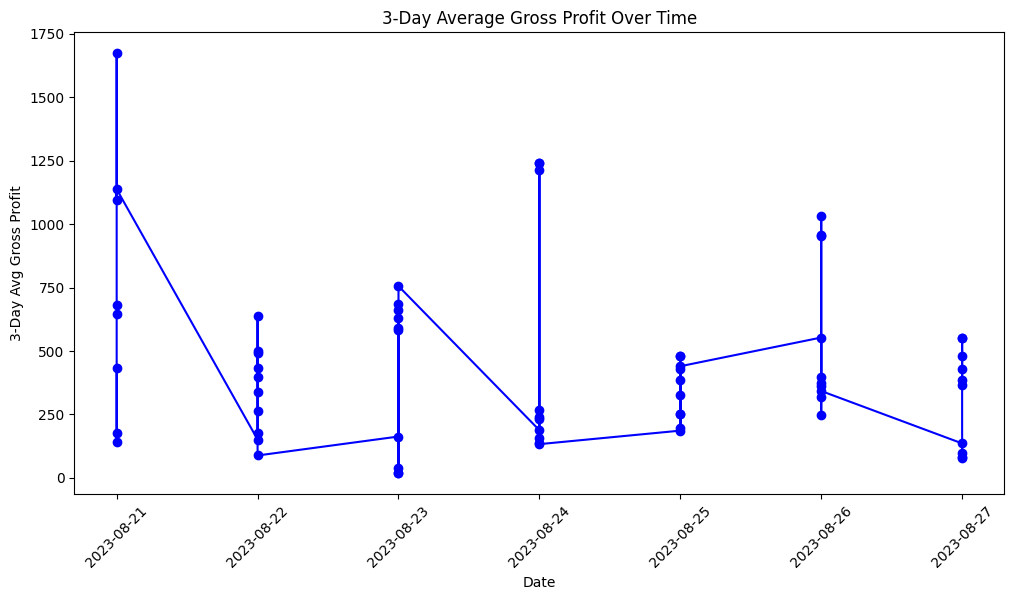

In [150]:
import matplotlib.pyplot as plt

# Plot the 3-day average gross profit over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['3DayAvgGrossProfit'], marker='o', linestyle='-', color='b')
plt.title('3-Day Average Gross Profit Over Time')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.xticks(rotation=45)
plt.show()


#8. Optimizing the sales process

In [151]:
# Calculate average gross profit per vendor and customer
avg_profit_per_vendor = data.groupby('Firm bought from')['Gross Profit'].mean()
avg_profit_per_customer = data.groupby('Customer')['Gross Profit'].mean()

# Display average profit per vendor and customer
print("Average Profit per Vendor:")
print(avg_profit_per_vendor)

print("\nAverage Profit per Customer:")
print(avg_profit_per_customer)


Average Profit per Vendor:
Firm bought from
Vendor1      311.118000
Vendor10     506.770000
Vendor2      117.907273
Vendor3     1061.778333
Vendor4      767.034444
Vendor5      230.877143
Vendor6      405.983333
Vendor7      354.360714
Vendor8       84.580000
Vendor9      711.116667
Name: Gross Profit, dtype: float64

Average Profit per Customer:
Customer
Customer1     885.095000
Customer10    738.488000
Customer2     421.567000
Customer3     150.721429
Customer4     556.228333
Customer5     187.897143
Customer6     275.822857
Customer7     313.945714
Customer8     649.891000
Customer9     385.816000
Name: Gross Profit, dtype: float64


#Based on the calculated average profit per vendor and customer:

##Vendor Optimization:

Consider retaining Vendor3, Vendor4, Vendor6, Vendor7, and Vendor9 as they contribute significantly to the average gross profit.
Evaluate the performance of Vendor1, Vendor2, Vendor5, and Vendor8, and assess whether improvements or negotiations are possible. Consider replacing underperforming vendors if necessary.

##Customer Optimization:

Focus on retaining Customer1, Customer10, Customer2, Customer4, Customer7, and Customer8, as they generate higher average gross profits.
Assess the relationships with Customer3, Customer5, and Customer6, and explore opportunities to increase sales or negotiate better terms.
Consider letting go of customers with consistently low contribution unless there are strategic reasons to retain them.

# 9.Calculating percentiles for buying and selling prices

In [152]:
# Calculate percentiles for buying and selling prices
buying_price_percentiles = data['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = data['Selling price'].quantile([0.25, 0.5, 0.75])

# Display the percentiles
print("Buying Price Percentiles:")
print(buying_price_percentiles)

print("\nSelling Price Percentiles:")
print(selling_price_percentiles)


Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


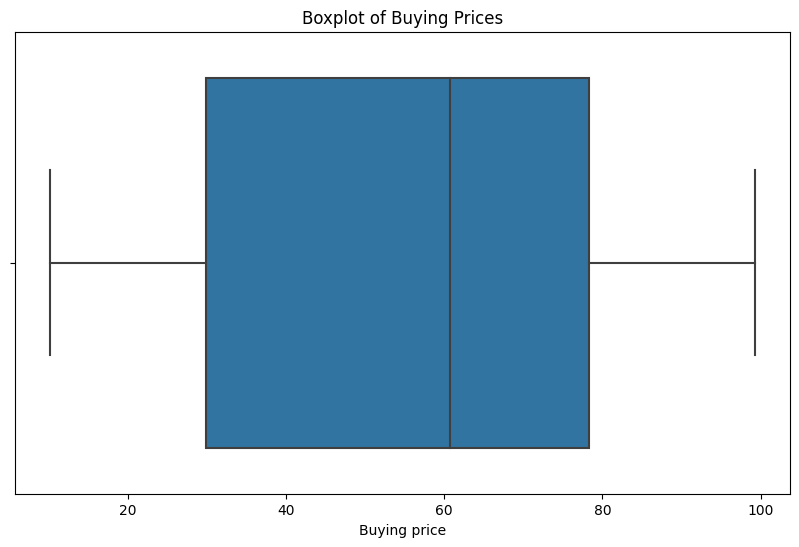

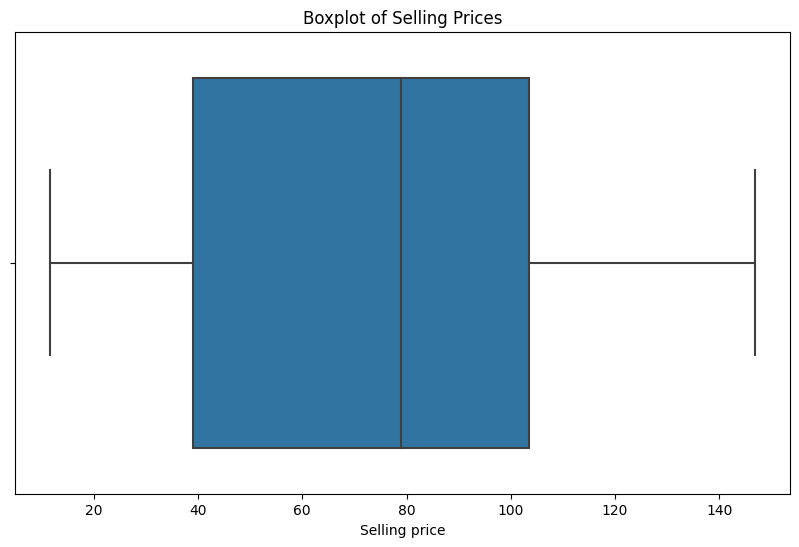

In [153]:
import seaborn as sns

# Boxplot for buying prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Buying price'])
plt.title('Boxplot of Buying Prices')
plt.show()

# Boxplot for selling prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Selling price'])
plt.title('Boxplot of Selling Prices')
plt.show()


#10. Analyze Sapota's pricing relative to percentiles

In [154]:
# Identify transactions where Sapota's prices fall below the 25th percentile or above the 75th percentile
below_25th_percentile = data[data['Selling price'] < selling_price_percentiles[0.25]]
above_75th_percentile = data[data['Selling price'] > selling_price_percentiles[0.75]]

# Display the results
print("Transactions where Selling Price is below 25th Percentile:")
print(below_25th_percentile)

print("\nTransactions where Selling Price is above 75th Percentile:")
print(above_75th_percentile)

Transactions where Selling Price is below 25th Percentile:
          Date Firm bought from  Buying price  Quantity bought    Customer  \
8   2023-08-21          Vendor1         20.95               95   Customer3   
10  2023-08-22          Vendor5         27.71               33   Customer2   
11  2023-08-22         Vendor10         10.48               80   Customer3   
24  2023-08-23          Vendor7         27.75               22   Customer1   
25  2023-08-23         Vendor10         10.19               42   Customer8   
31  2023-08-24          Vendor6         14.76               19   Customer2   
32  2023-08-24          Vendor7         26.29               55  Customer10   
33  2023-08-24          Vendor5         18.66               68   Customer5   
36  2023-08-24          Vendor7         24.75               20   Customer8   
37  2023-08-24          Vendor2         17.24               52   Customer5   
38  2023-08-24          Vendor2         14.30               85   Customer6   
39  2

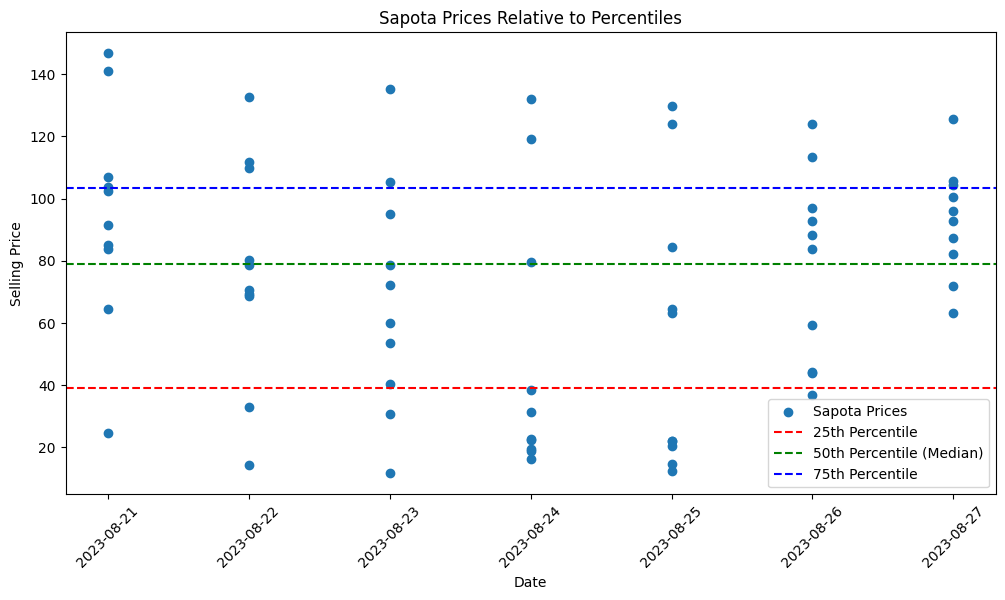

In [155]:
# Scatter plot for Sapota's prices relative to percentiles
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Selling price'], label='Sapota Prices')
plt.axhline(y=selling_price_percentiles[0.25], color='r', linestyle='--', label='25th Percentile')
plt.axhline(y=selling_price_percentiles[0.5], color='g', linestyle='--', label='50th Percentile (Median)')
plt.axhline(y=selling_price_percentiles[0.75], color='b', linestyle='--', label='75th Percentile')
plt.title('Sapota Prices Relative to Percentiles')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#11.Impact on Optimal Gross Margin after Honoring Vendor 4

In [156]:
# Assuming Vendor 4 is honored, recalculate the average profit per vendor
df_vendor4_honored = data[data['Firm bought from'] != 'Vendor4']

# Calculate average gross profit per vendor after honoring Vendor 4
avg_profit_per_vendor_after_honoring4 = df_vendor4_honored.groupby('Firm bought from')['Gross Profit'].mean()

# Display the updated average profit per vendor
print("Average Profit per Vendor after Honoring Vendor 4:")
print(avg_profit_per_vendor_after_honoring4)


Average Profit per Vendor after Honoring Vendor 4:
Firm bought from
Vendor1      311.118000
Vendor10     506.770000
Vendor2      117.907273
Vendor3     1061.778333
Vendor5      230.877143
Vendor6      405.983333
Vendor7      354.360714
Vendor8       84.580000
Vendor9      711.116667
Name: Gross Profit, dtype: float64


#12. Identify the Vendor for Strategic Tie-up to Maximize Gross Margin

In [157]:
# Calculate total gross profit per vendor
total_profit_per_vendor = data.groupby('Firm bought from')['Gross Profit'].sum()

# Identify the vendor with the highest total gross profit
strategic_vendor = total_profit_per_vendor.idxmax()

# Display the vendor for strategic tie-up
print(f"The vendor for strategic tie-up to maximize gross margin is: {strategic_vendor}")

# Calculate the theoretical max margin the firm could have from that vendor
theoretical_max_margin = total_profit_per_vendor.max()
print(f"Theoretical max margin from the strategic vendor: {theoretical_max_margin}")


The vendor for strategic tie-up to maximize gross margin is: Vendor4
Theoretical max margin from the strategic vendor: 6903.31


#13. Calculating Price Elasticity of Sapota for the Strategic Vendor

In [158]:
# Assuming 'strategic_vendor' is the chosen vendor, analyze price elasticity
chosen_vendor_data = df[df['Firm bought from'] == strategic_vendor]

# Calculate price elasticity for Sapota
price_elasticity = chosen_vendor_data['Quantity sold'].pct_change() / chosen_vendor_data['Buying price'].pct_change()

# Display the price elasticity
print("Price Elasticity of Sapota for the chosen vendor:")
print(price_elasticity)


Price Elasticity of Sapota for the chosen vendor:
1           NaN
29    -4.310504
34     1.288565
49     0.954267
54     0.618646
59     1.276458
62    -0.667329
63    26.444158
65    -6.949464
dtype: float64


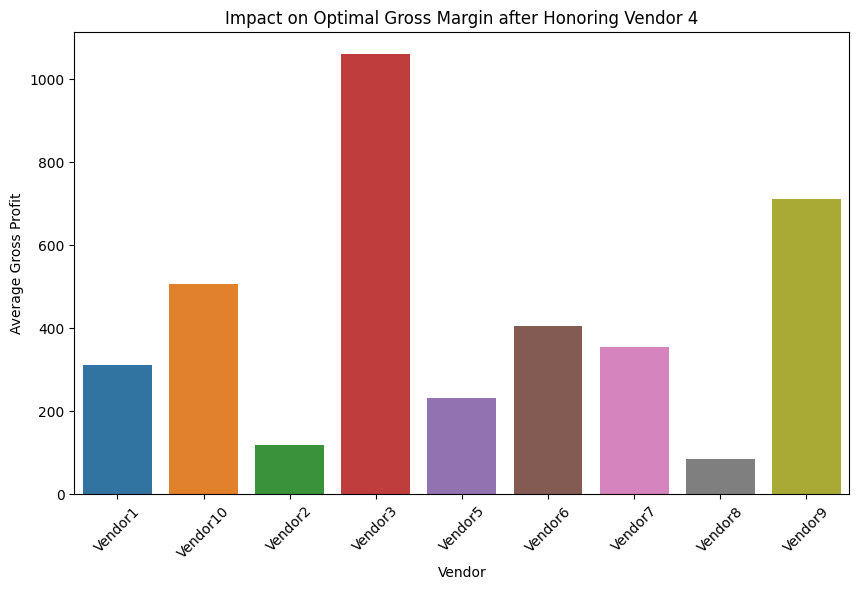

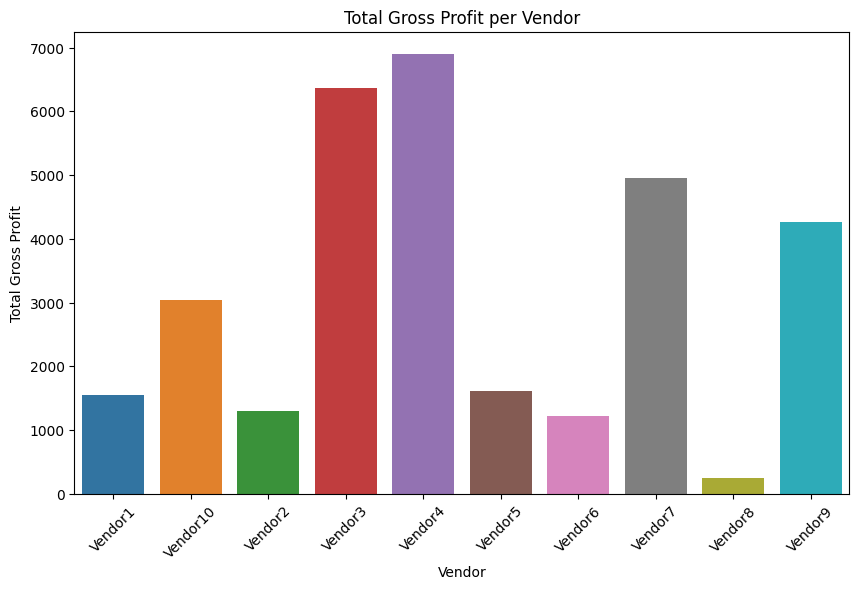

In [159]:
# Visualize the impact on optimal gross margin
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_profit_per_vendor_after_honoring4.index, y=avg_profit_per_vendor_after_honoring4.values)
plt.title('Impact on Optimal Gross Margin after Honoring Vendor 4')
plt.xlabel('Vendor')
plt.ylabel('Average Gross Profit')
plt.xticks(rotation=45)
plt.show()

# Visualize the total gross profit per vendor
plt.figure(figsize=(10, 6))
sns.barplot(x=total_profit_per_vendor.index, y=total_profit_per_vendor.values)
plt.title('Total Gross Profit per Vendor')
plt.xlabel('Vendor')
plt.ylabel('Total Gross Profit')
plt.xticks(rotation=45)
plt.show()
